<style type="text/css">
ol {
  counter-reset: item
}
li {
  display: block
}
li:before {
  content: counters(item, ".") " ";
  counter-increment: item
}
</style>
# Mathematische Methoden der Data Science - Block 4 / 5

<hr>

#### Prof. Dr. Fabian Transchel - Hochschule Harz
#### Stand: 07.12.2023

<hr>

## Inhalt

* Forts. Fourier-Transformation / Eigenwertzerlegung
* Elementare Statistik
* Wrap-Up: Ringvorlesung Chancengleichheit - Simspons Paradoxon. Im Anschluss, sofern Zeit bleibt: Technische Diskussion des vorgestellten Use Case.

<i>Wir importieren die folgenden Bibliotheken zu Illustration und allgemeinen Berechnungsbeispielen.</i>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as plgo
import seaborn as sns

<b>Erinnerung</b>: In Block 3 haben wir die Grundlagen der Vektorräume und Abbildungen sowie die Fourier-Zerlegung eingeführt.

<hr>

### Die Fourier-Transformation

<b>Idee</b>

Die Reihen-Darstellung von Funktionen und insbesondere auch das Konzept der Taylor-Entwicklung deutet eine interessante Eigenschaft von reellwertigen Funktionen an: Diese können unter bestimmten Annahmen (sog. "Quadratintegrierbarkeit") als Vektorraum aufgefasst werden:

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Funktionenraum)</b><br><br>
    Sei $D$ eine nichtleere Menge und $V$ ein Vektorraum über einem Körper $K$, dann bezeichnet $V^D$ die Menge aller Funktionen von $D$ nach $V$. Die Menge $V^D$ wird für $f,g \in V^D$ und für Skalare $\lambda \in K$ zu einem Vektorraum, wenn die beiden folgenden Verknüpfungen existieren:
    <ol>
        <li>Addition: $(f+g):D \rightarrow V, x \mapsto f(x) + g(x)$</li>
        <li>Skalarmultipliaktion: $\lambda f:D\to V, x \mapsto \lambda \cdot f(x)$</li>
    </ol>
</div>

Der oben definierte Vektorraum wird auch <i>linearer Funktionenraum</i> genannt, weil Multiplikation mit einer Zahl gerade auch das zahlfache der Funktion ergibt.<br><br>
Im Bereich der theoretischen Informatik ist der Funktionenraum $D^D$ interessant, weil er das Lambda-Kalkül darstellen würde. Dieser Raum kann aber nur mit Einschränkung definiert werden, weil die Isomorphie $D^D \cong D$ nicht erfüllt werden kann. (Anders ausgedrückt: Man kann mit der Lambda-Funktion zwar beliebige Turing-vollständige Funktionen definieren, aber nicht den Formalismus der Lambda-Funktion selbst.)

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Skalarprodukt für Funktionen)</b><br><br>
    Auf dem Vektorraum $C^0 ([a,b],\mathbb{R}$ der stetigen reellwertigen Funktionen auf dem Intervall $[a,b]$ ist das <i>$L^2$-Skalarprodukt</i> definiert als:
    $$\langle f,g\rangle = \int_a^b f(x) g(x)\,\text{d}x,$$
    für alle $f,g \in C^0 ([a,b],\mathbb{R}$.
</div><br>
Man nennt diese Schreibweise für beliebige Funktionen auch das <i>Faltungsintegral</i>. Das Skalarprodukt ist gerade 1, wenn die Funktionen identisch sind und Null, wenn sie keinen "Überlapp" haben, also bezüglich der Norm es kein Intervall gibt, in dem $f\cdot g$ von Null verschieden wäre.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Irreguläre Delta-Distribution)</b><br><br>
    Die (Integral-)Dichte einer skalierten Einheitsnormalverteilung der Form
    $$\delta_a(x) = \frac{1}{\sqrt{\pi}a}\cdot e^{-\frac{x^2}{a^2}}$$
    kann unter Grenzwertbetrachtung $a \to 0$ als punktförmige Integral-Testfunktion aufgefasst werden, da die Faltung
    $$\langle \delta (x-b), f\rangle = \int_a^b\delta(x-b)f(x) = f(b)$$
    gerade den Wert der Funktion $f$ an der Stelle $b$ beschreibt.
</div><br>
Die Anschauung hierfür lautet, dass die Delta-Distribution eine "beliebig schmale" Funktion beschreibt, die "beliebig hoch" wird, dabei aber stets den Flächeninhalt $1$ behält.

Neben der Entwicklung in eine Reihendarstellung, die die (periodische) Funktion mit beliebiger Genauigkeit approximiert gibt es noch weitere, oftmals praktischere Darstellungsformen der konzeptionellen Idee:

<b>Variantenübersicht</b>
<table>
<tr><th>Variante</th><th>Definitionsmenge</th><th>Periodizität</th><th>Frequenzspektrum</th></tr>
    <tr><td><b>Fourier-Reihe</b></td><td>kontinuierliches intervall</td><td>periodisch</td><td>diskret</td></tr>
    <tr><td><b>Kontinuierliche Fourier-Transformation</b></td><td>kontinuierlich</td><td>aperiodisch</td><td>kontinuierlich</td></tr>
    <tr><td><b>Diskrete Fourier-Transformation (DFT)</b></td><td>diskret, endlich</td><td>aperiodisch, periodisch fortgesetzt</td><td>diskret, endlich</td></tr>
    <tr><td><b>Zeitdiskrete Fourier-Transformation (DTFT)</b></td><td>diskret, endlich</td><td>aperiodisch</td><td>kontinuierlich</td></tr>
</table>

Hiervon ist für die praktische Arbeit zweifellos die diskrete Fourier-Transformation am relevantesten, da sie ein zeitdiskretes, endliches Signal (das periodisch fortgesetzt wird), auf ein diskretes, periodisches Frequenzspektrum abbildet, dieses nennt man gemeinhin <i>Bildbereich</i>. Sie hat große Bedeutung in der klassischen Signalverabreitung, der Digital-Analog-Wandlung und dem Feature-Engineering, denn eine Frequnzdarstellung von Zeitsignalen weist manchmal eine geringere Varianz gegenüber der Zielgröße auf, wenn es Auto- oder Retardkorrelationen (Signalwiedeholungen innerhalb des Definitions- bzw. Beobachtungsbereiches) gibt.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Diskrete Fourier-Transformation)</b><br><br>
    Sei $a = (a_0,a_1,\dots,a_n)$ eine Folge von (reellwertigen oder komplexen) Zahlen. ObdA kann angenommen werden, dass dies einer Periode des periodischen Signals entspricht (sonst kann interpoliert und/oder resampelt werden). Dann können daraus <i>Fourier-Komponenten</i> wie folgt berechnet werden:<br><br>
    $$\hat{a}_k = \sum_{j=0}^{N-1}e^{-2\pi\imath\frac{jk}{N}}\cdot a_j\quad \forall\, k= 0,\dots,N-1$$
</div><br><br>
Es ist einsehbar, dass dies eine sinnvolle Diskretisierung der Fourier-Reihe darstellt und diese somit effektiv(er) als die Reihe (mit unendlich vielen Summanden) in einer mathematisch effizienten Programmierung umgesetzt werden kann, dies ist die Implementierung der sog. <i>Fast Fourtier Transformation (FFT)</i>. Man nutzt aus, dass für Vielfache von $2: 4,16,32,64,\dots$ die Matrixdarstellung<br>
$$\hat{a} = W \cdot a \text{ mit } W[j,k] = e^{-2\pi \imath \frac{jk}{N}}$$
sehr effizient berechnet werden kann.

<b>Beispiel 1</b>:<br><br>
Es sei $f(x) = \sin(50 \cdot 2\pi \cdot x) + \frac{1}{2} \sin(80 \cdot 2\pi \cdot x)$. Dann ist die Zerlegung:

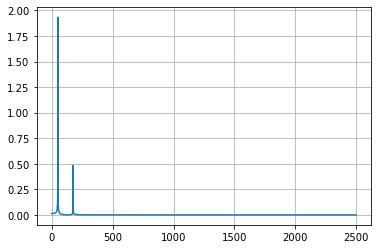

In [131]:
from scipy.fft import fft, fftfreq
grid = 6000
T = 1.0 / 5000.0
x = np.linspace(0.0, grid*T, grid, endpoint=False)
y = np.exp(x)*(np.sin(50.0 * 2.0*np.pi*x) + 0.25*np.sin(175.0 * 2.0*np.pi*x))
yf = fft(y)
xf = fftfreq(grid, T)[:grid//2]
plt.plot(xf, 2.0/grid * np.abs(yf[0:grid//2]))
plt.grid()
plt.show()

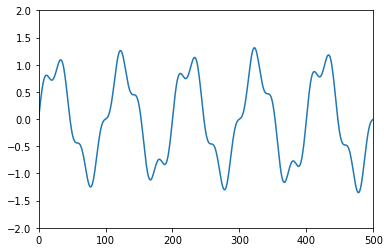

In [132]:
fig = plt.Figure()
plt.xlim(0, 500)
plt.ylim(-2, 2)
plt.plot(y)

<b>Beispiel 2</b>:<br><br>
Es sei $f(x) = \frac{1}{4}x^4 - \frac{1}{3}x^3 + \frac{1}{2}x^2 - x + 10$. Dann ist die Zerlegung:

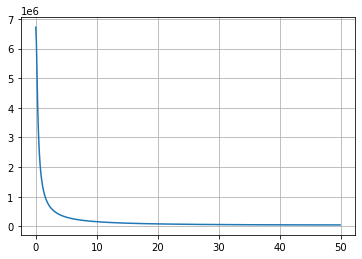

In [134]:
from scipy.fft import fft, fftfreq
grid = 1000
T = 1.0 / 100.0
x = np.linspace(0.0, grid*T, grid, endpoint=False)
y = np.exp(x)*(0.25*x**4-(1/3)*x**3+0.5*x**2-x+10)
yf = fft(y)
xf = fftfreq(grid, T)[:grid//2]
plt.plot(xf, 2.0/grid * np.abs(yf[0:grid//2]))
plt.grid()
plt.show()

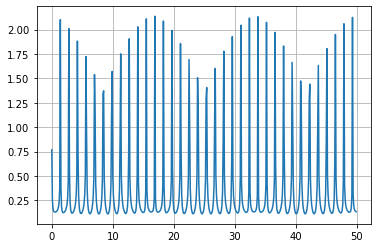

In [138]:
from scipy.fft import fft, fftfreq
grid = 1000
T = 1.0 / 100.0
x = np.linspace(0.0, grid*T, grid, endpoint=False)
y = np.tan(x*10000)
yf = fft(y)
xf = fftfreq(grid, T)[:grid//2]
plt.plot(xf, 2.0/grid * np.abs(yf[0:grid//2]))
plt.grid()
plt.show()

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
<b>Übung:</b>
Erzeugen Sie ein möglichst "breites" Spektrum der Fourier-Koeffizienten, also eine Funktion, die fast nirgends $0$ wird.
</div>

Lösung in den folgenden ausgeblendeten Zellen.

<b>Beispiel 3</b>:<br><br>
Breites Fourier-Spektrum via Zufallszahlen.

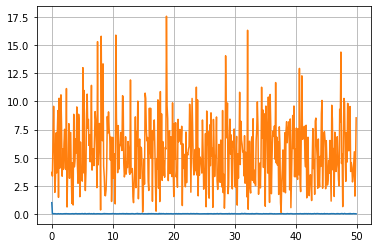

In [141]:
from scipy.fft import fft, fftfreq
grid = 1000
T = 1.0 / 100.0
x = np.linspace(0.0, grid*T, grid, endpoint=False)
y_1 = np.random.uniform(size=grid)
y_2 = np.random.normal(0,100,size=grid)
yf_1 = fft(y_1)
yf_2 = fft(y_2)
xf = fftfreq(grid, T)[:grid//2]
plt.plot(xf, 2.0/grid * np.abs(yf_1[0:grid//2]))
plt.plot(xf, 2.0/grid * np.abs(yf_2[0:grid//2]))
plt.grid()
plt.show()

<b>Unschärfe-Relation der gleitenden DFT</b><br><br>
Ein wesentlicher Punkt, der sich aus der Selbst-Dualität der Fourier-Darstellung (Die Transformierte der Transformierten ist bei geeigneter Normierung wieder die Funktion) ergibt: zeit- und Frequenzauflösung können nicht unabhängig voneinander gewählt werden: Möchte man Signale mit großer Frequenzbreite analysieren, so muss das Zeitfenster sehr groß werden. Das ist insbesondere deshalb Problematisch, weil die Anzahl der Beobachtungen in der zeitreihe effektiv schon vorgegeben ist und nicht frei gewährt werden kann und ein Resampling bzw. eine Glättung einen Informationsverlust zur Folge hat.<br><br>

Umgekehrt folgt daraus, dass für eine erwünschte hohe Zeitauflösung nur wenige Frequenzanteile bestimmt werden können. Es gilt: Die Frequenzauflösung entspricht etwa 1/Zeitfensterbreite $\Rightarrow$ Wird eine Frequenzauflösung von $10$Hz gewünscht, so muss das Zeitfenster auch mindestens $0.1$ Sekunden betragen.

<b>Unschärfe-Relation der gleitenden DFT</b><br><br>
Ein wesentlicher Punkt, der sich aus der Selbst-Dualität der Fourier-Darstellung (Die Transformierte der Transformierten ist bei geeigneter Normierung wieder die Funktion) ergibt: zeit- und Frequenzauflösung können nicht unabhängig voneinander gewählt werden: Möchte man Signale mit großer Frequenzbreite analysieren, so muss das Zeitfenster sehr groß werden. Das ist insbesondere deshalb Problematisch, weil die Anzahl der Beobachtungen in der zeitreihe effektiv schon vorgegeben ist und nicht frei gewährt werden kann und ein Resampling bzw. eine Glättung einen Informationsverlust zur Folge hat.<br><br>

Umgekehrt folgt daraus, dass für eine erwünschte hohe Zeitauflösung nur wenige Frequenzanteile bestimmt werden können. Es gilt: Die Frequenzauflösung entspricht etwa 1/Zeitfensterbreite $\Rightarrow$ Wird eine Frequenzauflösung von $10$Hz gewünscht, so muss das Zeitfenster auch mindestens $0.1$ Sekunden betragen.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Satz (Nyquist-Shannon-Abtasttheorem)</b><br><br>
    Sei $f$ ein bandbegrenztes Signal, das aus höchstens $\omega_{\text{max}}$ betragenden Frequenzanteilen zusammengesetzt ist. Dann kann es mit einer Folge äquidistanter Abtastungen exakt geschätzt werden, wenn mindestens mit einer Frequenz von $2\cdot \omega_{\text{max}}$ abgetastet wurde.
</div>

<hr>

### Die Eigenwertzerlegung

<b>Idee</b>

Die Frequenzraumdarstellung ist nur eine von vielen, in der Tat kann man beobachten, dass es unter der Bedingung, dass die Integrierbarkeit durch eine Messbarkeit der Funktionen gewahrt bleiben kuss, lasse sich viele Zerlegungen von Vektoren, Reihen und Funktionen finden, die äquivalent sind und für unterschiedliche Anwendungen geeignet sein können.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Satz (Eigenwert)</b><br><br>
    Sei $V$ ein Vektorraum über einem Körper $K$ und $f:V\to V$ eine lineare Abbildung von $V$ in sich selbst. Man bezeichnet einen Vektor $v \neq 0$ als Eigenvektor, wenn er auf ein Vielfaches $\lambda \in K$ auf sich selbst abgebildet wird:
    $$f(v) = \lambda v.$$<br>
    $\lambda$ wird als zugehöriger <i>Eigenwert</i> bezeichnet.<br><br>
    Anders beschrieben ist also $\lambda$ die Lösung der Gleichung $f(v) = \lambda v$.
</div><br>
Sei $\mathbb{R}^n$, ObdA $n > 1$ ein endlich-dimensionaler Vektorraum, so kann die Abbildung $f$ durch eine quadratische $n\times n$-Matrix beschrieben werden. Wir können dann in Matrixform schreiben:<br><br>
$$A \cdot x = \lambda \cdot x \Rightarrow (A-\lambda\mathbb{1})\cdot x = 0.$$<br><br>
Diese Gleichung kann für "hinreichend kleine $n$" mit geeigneten Methoden (siehe unten) gelöst werden, sonst nur numerisch näherungsweise.<br><br>
<b>Charakteristisches Polynom</b><br><br>
Die Gleichung $(A-\lambda\mathbb{1})\cdot x = 0$ definiert die Eigenwerte über ein homogenes lineares Gleichungssystem. Wenn dieses nicht unterbestimmt ist, dann existieren nach dem Fundamentalsatz der Algebra $n$ komplexe Nullstellen, wenn $n$ ungerade ist, so ist mindestens einer der Eigenwerte reell. Zu lösen ist also<br><br>
$$\det(A-\lambda\mathbb{1}) = 0.$$<br><br>



<b>Beispiel</b>:<br><br>
Es sei<br>
$$A = \begin{pmatrix}0 & 2 & -1\\ 2 & -1 & 3\\2 & -1 &3\end{pmatrix}.$$<br>
Dann ist <br><br>
$$A-\lambda\mathbb{1} = \begin{pmatrix}0 -\lambda & 2 & -1\\ 2 & -1-\lambda & 3\\2 & -1 &3-\lambda\end{pmatrix}$$<br>
und es gilt<br>
$$\det(A-\lambda \mathbb{1}) = (0-\lambda)(-1-\lambda)(3-\lambda)+|4|+2-(2\lambda+2+\lambda+12-4\lambda) = -\lambda^3 + 2\lambda^2+4\lambda-8 = -(\lambda-2)(\lambda-2)(\lambda+2)$$<br><br>
Somit sind die Eigenwerte von $A$ gerade $\lambda_{1,2} = -2, \lambda_3 = 2$. Man sagt, dass der Eigenwert $-2$ die <i>algebraische Vielfachheit</i> $2$ hat, da er doppelte Nullstelle ist. Dies bedeutet anschaulich, dass es einen zweidimensionalen Unterraum gibt, der auf sich selbst abgebildet wird, während der Eigenraum zum Eigenwert $\lambda_3$ orthogonal dazu ist (und auf sich selbst abgebildet wird).<br><br>
Hinweis: Wir haben hier den sog. <i>Satz von Sarrus</i> (siehe [https://de.wikipedia.org/wiki/Regel_von_Sarrus]) zur Entwicklung der Determinante verwendet. Dies ist nicht relevant für die Prüfung.

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    Berechnen Sie die Eigenwerte für
    <ol>
    <li>$A = \begin{pmatrix}1 & 0 \\ -1 & 0\end{pmatrix}$ und $B = \begin{pmatrix}1 & 1 \\ -1 & 1\end{pmatrix}$ und $R_\alpha = \begin{pmatrix}\cos \alpha & -\sin \alpha\\\sin \alpha & \cos \alpha\end{pmatrix}$ manuell.<br><br></li>
    <li>$C = \begin{pmatrix}0.5878 & 1 & 0 & 1 \\ -1 & 2 & -4 & 0 \\ 4 & 0 & 4 & 0 \\ 0 & 4 &-4 & \sqrt{2}\end{pmatrix}$ per CAS.</li>
    </ol>
</div>

Neben den Eigenwerten ist es oftmals zweckmäßig, die zugehörigen <i>Eigenvektoren</i> zu bestimmen: Sie geben diejenigen Richtungen an, das die Trägheitsmomente des beschriebenen Objekts (siehe unten: Hauptkomponenten) bei einer relevanten Transformation in dieser Richtung invariant gelassen werden.<br><br>
Die Menge der Eigenwerte wird <i>Spektrum</i> genannt:<br><br>
$$\sigma(A) = \{\lambda\in \mathbb{C} | \exists x \neq 0: Ax = \lambda x\}$$<br><br>
Die Eigenvektoren erhält man, indem wir die Lösungen $\lambda_i$ in die Matrixform des charakteristischen Polynoms einsetzen und das nun lineare Gleichungssystem lösen:<br>
$$\mathcal{X} = (A-\lambda \mathbb{1})\cdot x = 0$$<br>
Für $n$ Dimensionen lassen sich $n - |k|$ Eigenvektoren bestimmnen, wobei $|k|$ die Summe der algebraischen Vielfachheiten größer $1$ bezeichnet. Für das Beispiel der Eigenvektoren von $ A = \begin{pmatrix}0 & 2 & -1\\ 2 & -1 & 3\\2 & -1 &3\end{pmatrix}, \lambda_{1,2} = -2, \lambda_3 = 2$ ergibt sich also, dass es $3 - 1$ geometrische Eigenvektoren gibt. Da die algebraische Vielfachheit von $\lambda_{1,2} = -2$ gerade zwei beträgt, lässt sich für den Unterraum zum Eigenwert $-2$ ein weiterer Vektor (sog. Hauptvektor) bestimmen, der orthogonal zum goemetrischen Eigenvektor $e_1$ ist. Typischerweise wird $e_2$ so gewählt, dass bezüglich des nicht-entarteten geometrischen Eigenvektoren (hier: $e_1$) eine Orthonormalbasis des Unterraumes entsteht. Die Berechnung erfolgt über die Lösung von $(A-\lambda \mathbb{1})\cdot x = 0$:<br><br>
$$e_1: (A + 2\cdot\mathbb{1})\cdot x = 0 \Leftrightarrow \begin{pmatrix}0 + 2 & 2 & -1\\ 2 & -1+2 & 3\\2 & -1 &3+2\end{pmatrix} \cdot \begin{pmatrix}x_1 \\ x_2 \\ x_3\end{pmatrix} = \begin{pmatrix}0 \\ 0 \\0\end{pmatrix}$$<br><br>
Offensichtlich ergibt sich<br>
$$e_1 = \begin{pmatrix}\frac{3}{2}\\-2\\-1\end{pmatrix}.$$<br><br>
Für $\lambda_3 = 2$ erhalten wir<br><br>
$$e_3 = \begin{pmatrix}\frac{1}{2}\\0\\-1\end{pmatrix}.$$<br><br>
Der dritte Vektor $e_2$ der zugehörigen Basis muss also gewählt werden und kann über die Orthogonalitätsbedingung $e_1 \cdot e_2 = 0$ bestimmt werden:<br>
$$\begin{pmatrix}\frac{3}{2}\\-2\\-1\end{pmatrix}\cdot \begin{pmatrix}x_1 \\ x_2 \\ x_3\end{pmatrix} = 0, \quad \Rightarrow e_2 = \begin{pmatrix}2 \\ \frac{3}{2}\\0\end{pmatrix}.$$<br>
Es ist zu beachten, dass $\{e_1,e_2,e_3\}$ zwar eine Basis von $\mathbb{R}^3$ darstellt, diese aber <b>nicht</b> orthogonal und/oder normiert wäre. Die Eigenvektoren trennen das Spektrum von $A$ also nicht in disjunkte Unterräume auf. Eine wesentliche Folgerung daraus ist, dass $A$ nicht diagonalisierbar ist, also keine Transformation der Form $D_A = S^{-1}AS$ existiert, sodass $S$ eine invertierbare quadratische Matrix und $D$ eine diagonale Matrix (nur Elemente auf der Diagonalen) wäre. Eine sinnvolle Verallgemeinerung stellt die Singulärwertzerlegung dar, die die Diagonalisierbarkeit nicht voraussetzt, wie wir gleich sehen werden.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Gram-Schmidtsches Orthogonalisierungsverfahren)</b><br><br>
    Seien $\{w_1,\dots,w_n\}$ linear unabhängige Vektoren in $V$. Dann erzeugt die Vorschrift<br>
    $$v_n = w_n - \sum_{i=1}^{n-1}\frac{\langle v_i,w_i\rangle}{\langle v_i, v_i\rangle}\cdot v_i$$<br><br>
    ein <i>Orthogonalsystem</i> von $n$ paarweise orthogonale Vektoren, die den selben Untervektorraum bilden wie $\{w_1,\dots,w_n\}$.
</div>

Ganz offenbar gilt<bR><br>
$$v_1 = w_1$$<bR>
und im Folgenden<br><br>
$$v_2 = w_2 - \frac{\langle v_1,w_2\rangle}{\langle v_1, v_1\rangle} \cdot v_1,\quad v_3 = w_3 - \frac{\langle v_1,w_2\rangle}{\langle v_1, v_1\rangle} \cdot v_1 - \frac{\langle v_2,w_3\rangle}{\langle v_2, v_2\rangle} \cdot v_2,\quad \text{usw.}$$<br><br>
<b>Beispiel</b>:<br><br>
Seien $w_1 = \begin{pmatrix}x_1 \\ x_2 \\ x_3\end{pmatrix}$ und $w_2 = \begin{pmatrix}x_1 \\ x_2 \\ x_3\end{pmatrix}$ linear unabhängige Vektoren. Dann ist 
    $$v_1 = w_1 = \begin{pmatrix}3 \\ 1 \\ 2\end{pmatrix} \quad \text{und} \quad v_2 = w_2 - \frac{\langle v_1, w_2 \rangle}{\langle v_1, v_1\rangle \cdot v_1} = \begin{pmatrix}2 \\ 2 \\ 2\end{pmatrix} - \frac{12}{14} \cdot \begin{pmatrix}3 \\ 1\\ 2\end{pmatrix} = \frac{1}{7}\cdot\begin{pmatrix}-4 \\ 8 \\ 2\end{pmatrix}.$$

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    Es seien $w_1 = \begin{pmatrix}3 \\ 1\end{pmatrix}$ und $w_2 = \begin{pmatrix}2\\2\end{pmatrix}$ auf einem Vektorraum mit dem Standardskalarprodukt definiert.<br><br>
    Berechnen Sie die Orthogonalbasis mittels des Gram-Schmidt-Verfahrens.<br><br>
    Verifizieren Sie die Richtigkeit der Rechnung durch Überprüfung von $\langle v_1, v_2\rangle = 0$.
</div>

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Diagonalisierbarkeit)</b><br><br>
    Eine quadratische Matrix $D = (d_{ij})$ über einem Körper $K$, deren Elemente $d_{ij}$ für $i \neq j$ verschwinden, heißt <i>Diagonalmatrix</i>. Man schreibt auch<br>
    $$D = \text{diag}(d_1,d_2,\dots,d_n):=\begin{pmatrix}d_1 & 0 & \cdots & 0\\0 & d_2 & \ddots & \vdots\\\vdots & \ddots & \ddots & 0 \\ 0 & \cdots & 0 & d_n\end{pmatrix}$$<br><br>
    Eine quadratische Matrix $A$ heißt <i>diagonalisierbar</i>, wenn es eine Diagonalmatrix $D_A$ gibt, zu der sie ähnlich ist, also eine invertierbare Matrix $S$ existiert, sodass gilt<br>
    $$D_A = S^{-1}AS \quad \text{oder} \quad AS = SD_A.$$<br>
    Eine Abbildung $f: V \to V$ heißt <i>diagonalisierbar</i>, wenn eine Basis $B$ in $V$ existiert, sodass $M_B(f)$ diagonal ist.
</div><br>

Neben der Definition sind weitere hinreichende Bedingungen für Diagonalisierbarkeit bekannt.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Satz (Hinreichende Bedingungen für Diagonalisierbarkeit)</b><br><br>
    Sei $A$ eine $n\times n$-Matrix über $K$. $A$ ist genau dann diagonalisierbar, wenn eine folgende Bedingungen erfüllt sind:<br><br>
    <ol>
        <li>Das charakteristische Polynom $\mathcal{X}_A(\lambda)$ lässt sich vollständig in Linearfaktoren zerlegen und die geometrische Vielfachheit entspricht der algebraischen Vielfachheit für jedes $\lambda_i$.</li>
        <li>Es gibt eine Basis in $K^n$, die aus Eigenvektoren für $A$ besteht.</li>
        <li>Die Summe der jeweiligen Eigenräume entspricht gerade $n$: $\sum_{\lambda\in\sigma(A)}\text{dim}(E_\lambda(A)) = n$, wobei $\sigma(A)$, das <i>Spektrum</i> von A bezeichnet.</li>
    </ol>
</div><br>
<b>Hinweis</b>: Es gibt noch eine ganze Reihe weitere gleichfalls äquivalente Bedingungen, die aber Konzepte erfordern, die im Rahmen unserer Inhalte nicht thematisiert werden.

Das Studium der Eigen- und Hauptwerte von Abbildungen erlauben es uns nun, zwei für das Maschinelle Lernen eminent wichtige Konzepte zu formalisieren, die Singulärwert- und Hauptkomponentenzerlegungen.

Diagonalisierbarkeit von quadratischen Matrizen ist eine überaus nützliche Beobachtung. Doch sind in der Praxis nicht alle Matrizen, für die die relevanten Momente interessant zu bestimmen wären, quadratisch. Abhilfe schafft die Singulärwertzerlegung, die weder quadratische Matrizen noch Regularität erfordert:

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Singulärwertzerlegung)</b><br><br>
        Für eine (komplexe) $m\times n$-Matrix mit Rang $r$ bezeichne das Produkt<br><br>
    $$M = U \Sigma V^*$$<br>
    die <i>Singulärwertzerlegung</i>, wobei<br>
    <ol>
        <li>$U$ eine unitäre $m\times m$-Matrix ist, d.h. die Identität $...$ gilt,</li>
        <li>$V^*$ die Adjungierte einer unitären $n \times n$-Matrix $V$ ist sowie</li>
        <li>$\Sigma$ eine reelle $m \times n$-Matrix der folgenden Gestalt ist:<br>$$\begin{pmatrix}\sigma_1 & & & & \vdots & \\ & \ddots & & \dots & 0 & \dots\\ & & \sigma_r & & \vdots & \\ & \vdots & & & \vdots & & \\ \dots & 0 & \dots & \dots & 0 & \dots\\ & \vdots & & & \vdots\end{pmatrix},$$<br>mit $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$.</li>
    </ol>
    Die Einträge $\{\sigma_i\}$ heißen <i>Singulärwerte</i> von $M$ und sind bis auf Reihenfolge eindeutig bestimmt. Weder $U$ noch $V$ sind eindeutig, es gibt unendlich viele Möglichkeiten für $U$ und $V$, die allerdings alle die gleichen relevanten Eigenschaften haben.
</div><br>

<b>Intuition</b><br><br>
Die Singulärwertzerlegung kann als Faktorisierung von unabhängigen Transformationen gesehen werden, sobei die unitären Matrizen $U$ und $V^*$ orthogonale Transformationen darstellen und $\Sigma$ eine Streckung entlang des rotierten Bezugssystems. Die Singulärwerte geben also, wenn sie einzeln aufgefasst werden, die Streckungsfaktoren in richtung der (rotierten) Basisvektoren an.<br><br>
<img src="Block 5/1920px-Singular-Value-Decomposition.svg.png" style="width:480px;">
<div style="font-size:0.75em;">[Bildquelle: https://de.wikipedia.org/wiki/Singul%C3%A4rwertzerlegung#/media/Datei:Singular-Value-Decomposition.svg, User Georg-Johann,  CC-BY 3.0.]</div><br><br>

Ist also $A$ eine Matrix mit niedrigem Rang (z.B. eine Matrix von $p$ Beobachtungen und $n$ Merkmalen, wobei $p >> n$ gelte) und einem Rauschen $N$, dann ist<br><br>
$$A = A_0 + N,$$
wobei $N$ im Vergleich zu $A_0$ klein ist. Dabei wird die Anzahl der Singulärwerte $1 \geq \sigma_i >> 0$ als der <i>"numerische Rang"</i> von $A$ Matrix bezeichnet.
Kann man den "echten" Rang von $A$ schätzen, so lässt sich das Rauschen entfernen, indem man $A$ durch eine Matrix $A'$ mit dem niedrigeren Rang annähert.
<br><br>
<b>Vorgehen</b>
<ol>
    <li>Man berechne $A^TA$.</li>
    <li>Man berechne die Eigenvektoren $u_i$ von $A^TA$.</li>
    <li>Es muss gelten $Au_i = c\cdot v_i$.</li>
    <li>Man normiere die $\{v_i\}$. (Eigenvektoren von $V^T$.)</li>
    <li>Es ist $U_{ij} = [v_i]_j$ und $V_{ij} = [u_i]_j.$</li>
    </ol>
<b>Beispiel:</b>
Es sei $A = \begin{pmatrix}2 & 2 \\ -1 & 1\end{pmatrix}$. Dann ist<br><br>
$$A^TA = \begin{pmatrix}5 & 3 \\ 3 & 5\end{pmatrix}.$$<br><br>
Die Eigenvektoren von $A^TA$ sind offenbar $\begin{pmatrix}1 \\ 1\end{pmatrix}$ und $\begin{pmatrix}-1 \\ 1\end{pmatrix}$, also ergibt sich
$$u_1 = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix} \quad \text{und} \quad u_2 = \frac{1}{\sqrt{2}}\begin{pmatrix}-1 \\1\end{pmatrix}.$$<br><br>
Wir können nun die linksseitigen Eigenvektoren $\{u_i\}$ bestimmen:
$$Au_1 = \Big(\begin{array}\,\, 2 & 2 \\ -1 & 1\end{array}\Big)\begin{pmatrix}1/\sqrt{2} \\ 1/\sqrt{2}\end{pmatrix} = \begin{pmatrix}2\sqrt{2} \\ 0\end{pmatrix},\, \text{also } v_1 = \begin{pmatrix}1 \\ 0\end{pmatrix},\, \text{analog findet man }v_2 = \begin{pmatrix}0 \\ 1\end{pmatrix}.$$
Da $Au_1 = 2\sqrt{2}$ gilt, ist der erste Singulärwert $\sigma_1 = 2\sqrt{2}$ und analog $\sigma_2 = \sqrt{2}$. Damit ist die vollständige Singulärwertzerlegung bestimmbar:<br><br>
$$\begin{pmatrix}2 & 2 \\ -1 & 1\end{pmatrix} = \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix} \begin{pmatrix}2\sqrt{2} & 0 \\ 0 & \sqrt{2}\end{pmatrix} \begin{pmatrix}1/\sqrt{2} & 1/\sqrt{2} \\ -1/\sqrt{2} & 1/\sqrt{2}\end{pmatrix}$$

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    
Sei $A = \begin{pmatrix}3 & 1 & 1\\ -1 & 3 & 1\end{pmatrix}$.

Berechnen Sie <i>eine</i> Singulärwertzerlegung.
</div>

Eine sinnvolle Verallgemeinerung in Sachen Data Science ist die sog. <i>Hauptkomponentenanalyse</i> (bzw. -zerlegung). Diese basiert auf der Idee, dass wir Realsierungen von Zufallsvariablen (also Beobachtungen) die Kovarianzmatrix diagonalisiert werden kann. Aber der Reihe nach, zunächst muss einiges an Werkzeug der Stochastik hervorgeholt werden:

<hr>

### Elementare Statistik

Die Inhalte gehen nun zunehmend in thematische-formale Unschärfen über, sodass wir zur EInführung der Hauptkomponentenanalyse zunächst den Begriff der Zufallsvariable wiederholen wollen. Nachfolgend sehen wir, dass mit der grundlegenden Statistik alle Werkzeuge vorhanden sind, um auch komplexere Sachverhalte beschreiben zu können, und sich (lineare) Algebra, Analysis und Statistik nicht mehr als Gebiete trennen lassen, sondern stets verschiedene Aspekte verknüpft werden (müssen).

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Zufallsvariable)</b><br><br>
    Eine Variable oder ein Merkmal $X$, dessen Werte oder <i>Ausprägungen</i> die Ergebnisse eines Zufallsvorgangs sind, heißt <i>Zufallsvariable</i>.<br><br>
    Die Zahl $x \in K$, die $X$ bei einer Durchführung oder <i>Messung</i> des Vorgangs annimmt, heißt <i>Realisierung.</i>
</div><br>
Die Menge der Realisierungen $K$ kann eine endliche Menge von diskreten Ereignissen sein, also kategorieller natur sein, genauso aber ein Intervall über einem Körper oder ein Körper wie $\mathbb{R}$ oder $\mathbb{C}$.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Diskrete Zufallsvariable)</b><br><br>
    Eine Zufallsvariable $X$ heißt <i>diskret</i>, falls sie nur endlich viele oder abzählbar unendlich viele Ausprägungen $\{x_1,x_2,\dots,x_n\}$ annehmen kann. Die <i>Wahrscheinlichkeitsverteilung</i> von $X$ ist durch die Wahrscheinlichkeiten $P(X=x_i) = p_i, \quad i=1,2,\dots,n$ gegeben.
</div><br>

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Verteilungsfunktion einer diskreten Zufallsvariable)</b><br><br>
    $$F(x) = P(X \leq x) = \sum_{i|x_i \leq x}f(x_i)$$
</div><br>

Analog dazu zu betrachten ist ebenfalls die Verteilungsfunktion der Realisierungen/Beobachtungen:

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Empirische Verteilungsfunktion)</b><br><br>
    Es gelte:<br><br>
    $$F(x) = \frac{H(x)}{n},$$<br>
    d.h. der Anteil der Werte $x_i$ mit $x_i \leq x$, bzw.<br><br>
    $$F(x) = f(a_1)+f(a_2)+\dots+f(a_n) = \sum_{i|a_i\leq x}f(a_i),$$<br>
    wobei insbesondere $a_j \leq x$ und $a_{j+1} > x$ gelten.
</div><br>

Statt der (relativen) Wahrscheinlichkeiten werden in diesem Falle also die relativen Häufigkeiten addiert.

<b>Beispiel</b>:<br><br>
Um den <i>praktischen</i> Unterschied der letzten zwei Definitionen zu verdeutlichen, plotten wir einmal eine (numerisch grobe) Realisierung der Standardnormalverteilung $\mathcal{N}(0,1)$ gegenüber der formalen Verteilungsfunktion:

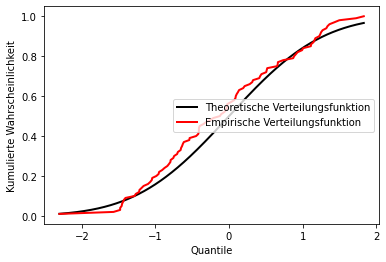

In [17]:
from scipy import stats

def ecdf(samples):
    # Falls kein np.array (z.B. pandas sequence) vorliegt
    sample = np.atleast_1d(samples)
    # Werte durchzählen
    quantiles, counts = np.unique(sample, return_counts=True)
    # Kumulative Summe bestimmen und mit Sample size gewichten
    cumprob = np.cumsum(counts).astype(np.double) / sample.size
    return quantiles, cumprob

# a normal distribution with a mean of 0 and standard deviation of 1
n = stats.norm(loc=0, scale=1)

# Zufallszahlen ziehen
sample = n.rvs(100)

# Empirische Verteilung berechnen
x_empirisch, y_empirisch = ecdf(sample)

# Theoretische Verteilung
x_theo = np.linspace(x_empirisch[0], x_empirisch[-1], 1000)
y_theo = n.cdf(x_theo)

# plot
fig, ax = plt.subplots(1, 1)
ax.plot(x_theo, y_theo, '-k', lw=2, label='Theoretische Verteilungsfunktion')
ax.plot(x_empirisch, y_empirisch, '-r', lw=2, label='Empirische Verteilungsfunktion')
ax.set_xlabel('Quantile')
ax.set_ylabel('Kumulierte Wahrscheinlichkeit')
ax.legend(fancybox=True, loc='right')
plt.show()

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    Berechnen Sie die kumulative Verteilungsfunktion für eine auf eins normierte Gleichverteilung und die Gamma-Verteilung $\Gamma(0.5,2)$. Wie sehen die zugehörigen Dichtefunktionen aus?                                                                                                                                                                                         
</div>

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Unabhängigkeit von (stetigen) Zufallsvariablen)</b><br><br>
    Zwei stetige Zufallsvariablen $X$ und $Y$ sind <i>unabhängig</i>, wenn für alle $x,y \in \mathbb{R}$ gilt:<br><br>
    $$P(X\leq x, Y\leq y) = P(X\leq x)\cdot P(Y\leq y) = F_X(x)\cdot F_Y(y),$$
    mit den Verteilungsfunktionen $F_X, F_Y$ von resp. $X$ bzw. $Y$.
</div><br>

Zusätzlich zur Unabhängigkeit wird oft gefordert, dass Zufallsvariablen "<b>i.i.d.</b>" (engl. "independent and identically distributed") seien sollten, also zusätzlich zur Unabhängigkeit auch die gleiche Verteilungsfunktion aufweisen müssen. Die deutsche Abkürzung "<b>u.i.v.</b>" ist in älteren Lehrbüchern zu finden, aber mittlerweile ungebräuchlich.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Kovarianzmatrix)</b><br><br>
    Sei $X$ ein Zufallsvektor mit $X = \begin{pmatrix}X_1\\X_2\\\vdots\\X_n\end{pmatrix}$, wobei $E(X) = E\begin{pmatrix}X_1\\X_2\\\vdots\\X_n\end{pmatrix} = \begin{pmatrix}\mu_1\\\mu_2\\\vdots\\\mu_n\end{pmatrix}$ der Erwartungswert sei. Ferner sei mit $\text{Var}(X_i) = \sigma_i^2$ die Varianz der skalaren Zufallskomponenten $X_i$ beschrieben und mit $\text{Cov}(X_i,X_j), i\neq j$ die paarweise Kovarianz. Die <i>Kovarianzmatrix</i> für $X$ ist dann definiert als<br><br>
    $$\text{Cov}(X) = E\big((X-\mu)(X-\mu)^T\big) = \begin{pmatrix}X_1\\X_2\\\vdots\\X_n\end{pmatrix} = \begin{pmatrix}\sigma_1^2 & \text{Cov}(X_1,X_2) & \dots & \text{Cov}(X_1,X_n)\\\text{Cov}(X_2,X_1) & \sigma_2^2 & \dots & \text{Cov}(X_2,X_n)\\ \vdots & \vdots & \ddots & \vdots\\\text{Cov}(X_n,X_1) & \text{Cov}(X_n,X_2) & \dots & \sigma_n^2\end{pmatrix} = \Sigma_X$$
</div><br>
Neben dem Erwartungswertvektor $E(X)$ ist die Kovarianzmatrix die wichtigste Kenngröße einer multivariaten Zufallsverteilung.<br><br>
<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Satz (Eigenschaften der Kovarianzmatrix)</b><br><br>
    Sei $X$ ein Zufallsvektor mit Kovarianzmatrix $\Sigma_X$ wie oben. Dann gilt:
    <ol>
        <li>Auf der Diagonalen steht wegen $\text{Cov}(X_i,X_i) = \text{Var}(X_i) = \sigma_i^2$ die Varianz, welche immer positiv ist.</li>
        <li>Für reelle $X$ sind alle Einträge positiv semidefinit und $\text{Cov}(X)$ somit <i>immer</i> diagonalisierbar. Daraus folgt zudem, dass die diagonalisierte Kovarianzmatrix wieder eine Kovarianzmatrix darstellt.</li>
        <li>Reelle Kovarianzmatrizen können als Ellipsoide dargestellt werden. Das heißt, dass der Varianzradius in jedem Merkmal gerade die Halbachsen des jeweiligen Unterraumes bestimmt und die konvexe Hülle der realisierten Beobachtungen darstellt.</li>
        <li>Für Vektoren $b \in \mathbb{R}^n$ gilt $\text{Cov}(X + b) = \text{Cov}(X)$. Die Kovarianzmatrix ist invariant unter Translation.</li>
        <li>Sind $X$ und $Y$ unkorrelierte Zufallsvektoren, dann gilt $\text{Cov}(X + Y) = \text{Cov}(X) + \text{Cov}(Y).$
        <li>Es gilt $\text{Cov}(X + Y,Z) = \text{Cov}(X,Z) + \text{Cov}(Y,Z).$</li>
        <li>Die Kovarianzmatrix eignet sich auch für Messwerte. Statt der Zufallsvektoren setzt man die empirische Verteilung ein.</li>
    </ol>
</div><br>

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    Es sei folgende Messung vorgenommen worden:<br><br>
    <table><tr><th>$x_1$</th><td>1</td><td>2</td><td>2</td><td>4</td><td>5</td><td>6</td><td>9</td><td>9</td><td>9</td><td>13</td></tr>
        <tr><th>$x_2$</th><td>1.41</td><td>1.56</td><td>2.19</td><td>2.79</td><td>3.04</td><td>2.23</td><td>3.74</td><td>3.78</td><td>2.80</td><td>4.81</td></tr></table>
    Berechnen Sie die Mittelwerte, deren Standardabweichungen und schließlich die Kovarianzmatrix. Was beobachten Sie?<br><br>
    Berechnen Sie die Ellipsenform $\Big\{(x_1,x_2) \cdot C \cdot \begin{pmatrix}x_1 \\ x_2\end{pmatrix} = k^2 \Big\}$ für die Kovarianzmatrix $C = \text{Cov}(\overline{x}_1,\overline{x}_2)$ und plotten Sie diese in einen Scatterplot mit den Beobachtungen.
</div>

<b>Hauptkomponentenzerlegung</b><bR><br>
Die Idee der Hauptkomponentenanalyse beseht darin, dass man für einen Datensatz von $n$ Beobachtungen mit $p$ Merkmalen eine $p\times p$-Matrix bestimmen kann, die deskriptiv für die wesentlichen Statistischen Momente ist: Die Kovarianzmatrix. Ihre Diagonalisierung hat nützliche Eigenschaften.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Hauptkomponentenzerlegung)</b><br><br>
    Sei $X$ ein Zufallsvektor aus $p$ unabhängigen Zufallsvariablen, die jeweils $\mu = 0$ erfüllen. Dann ist $\text{Cov}(X) = \Sigma_X = E(XX^T)$ symmetrisch und positiv definit. Die Eigenwerte von $\Sigma_X$ können o.B.d.A. aufsteigend angeordnet werden, sodass sich die Diagonalmatrix $\Lambda$ ergibt, die mit den Eigenvektoren $\Gamma$ die Singulärwertzerlegung $\Lambda = \Gamma^T\Sigma\Gamma$ erfüllt.<br><br>
    Die Abbildung $X \mapsto Y: \Gamma^TX$ beschreibt also eine Kovarianzmatrix des so transformierten Zufallsvektors. Es gilt also $\text{Var}(Y_i) = \lambda_i$. Durch die Sortierung gilt zudem, dass $\lambda_1$ der größte Eigenwert ist, $\lambda_2$ der zweitgrößte usw.<br><br>
    Man sagt, dass die <i>Hauptkomponente</i>... 
</div><br>
Anmerkung: Die Hauptkomponentenanalyse ist nur für komplett (also multivariat) normalverteilte Merkmale eine optimale Methode - in der Praxis reicht es aber aus, annähernd normalverteilte Spalten zu verwenden und die weiteren wegzulassen.<br><br>
<b>Beispiel:</b><br><br>
Als erstes instruktives Beispiel wollen wir die bereits bekannten Iris-Daten heranziehen.

In [75]:
df = pd.read_csv("Material/iris.csv")

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2) # Achtung: Dimension/Anzahl der PCs muss zuvor gewählt werden!
components = pca.fit_transform(x)
pca_df = pd.DataFrame(data = components, columns = ['PC_1', 'PC_2'])
pca_df = pd.concat([pca_df, df[['class']]], axis = 1)
pca_df

,PC_1,PC_2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


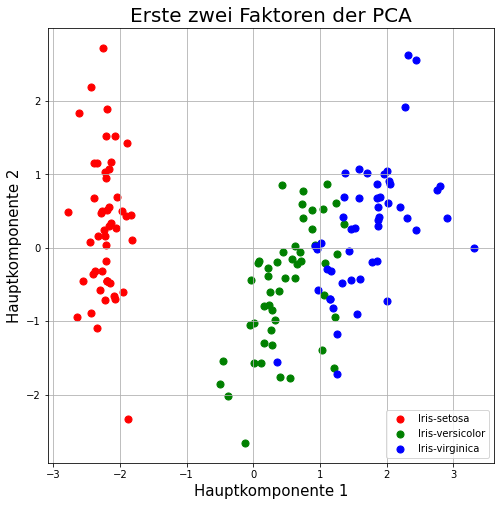

In [89]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Hauptkomponente 1', fontsize = 15)
ax.set_ylabel('Hauptkomponente 2', fontsize = 15)
ax.set_title('Erste zwei Faktoren der PCA', fontsize = 20)
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for classs, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == classs
    ax.scatter(pca_df.loc[indicesToKeep, 'PC_1'], pca_df.loc[indicesToKeep, 'PC_2'], c = color, s = 50)
ax.legend(classes)
ax.grid()

Man kann zudem prüfen, wie groß der Anteil der jeweils erklärten Varianz ist:

In [147]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    Das vorhergehende Beispiel soll nun mit dem Datensatz <b>cruise_ship_info.csv</b> vorgenommen werden:
    <ol>
    <li>Wie viele Hauptkomponenten sollten gewählt werden? Geben Sie die erklärte Varianz für die ersten $1,\dots,6$ Hauptkomponenten in einem Barchart an.</li>
    <li>Plotten Sie die ersten beiden Hauptkomponenten wie im Beispiel gezeigt in einem Scatterplot und fügen Sie die Projektionen der ursprünglichen Merkmale hinzu.</li>
    </ol>
</div>

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Art von statistischen Datenquellen)</b><br><br>
    In der empirischen Statistik ist zu unterscheiden, ob die zu betrachtenden Daten bereits vorliegen (<i>Erhebung</i>) oder ob sie mittels Tests einer Beantwortungsmaschine in einem <i>Experiment</i> gewonnen werden.<br><br>
    Hinweis: Die Zufallsvariable wird im informationstheoretischen Zusammenhang manchmal auch <i>Orakel</i> genannt, wenn die zugrunde liegenden Mechanismen nicht zugänglich sind.
</div>

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Erhebungsarten)</b><br><br>
    In der beschreibenden Statistik sind folgende Arten der Datenerhebung zu unterscheiden:<br>
    <ol>
    <li>Primärstatistische Erhebung: Die Erhebung wird spezifisch und speziell im Hinblick auf die vorliegende Fragestellung durchgeführt.</li>
    <li>Sekundärstatistische Erhebung: Die Erhebung erfolgt aus bereits vorhandenen Orginaldaten (z.B. stat. Jahrbücher).</li>
    <li>Tertiärstatistische Erhebung: Die Erhebung erfolg auf Basis von Kennzahlen der wünschenswerten Datenart, z.B. Mittelwerten, Standardabweichungen oder anderen Aggregierungen oder Komprimierungen.</li>
    </ol>
    Hinweis: Es ist grundsätzlich davon auszugehen, dass mit der zunehmenden Entfernung von der Primärstatistischen Erhebung immer weitere Fehlerquellen hinzutreten.
</div><br>

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Lagemaße)</b><br><br>
    Lagemaßen charakterisieren Zufallsverteilungen durch numerische Werte. Welches Lagemaß zweckmäßig zur Beschreibung ist, hängt vom Kontext der Betrachtung ab. Sei eine empirische Verteilung durch $N$ Realisierungen $\{x_i\}$ gegeben. <i>Lagemaße erster Ordnung</i> sind:
    <ol>
    <li><b>(Arithmetischer) Mittelwert</b>: $\overline{x} = \frac{1}{N}\sum_{i=1}^N x_i$<br><br></li>
    <li><b>Median</b>: $x_\text{med} = \Bigg\{\begin{array}{ll}
x_{\frac{n+1}{2}} & \text{falls }x \text{ gerade}\\
\frac{1}{2}\Big( x_{n/2} + x_{n/2+1}\Big) & \textrm{sonst} \\
\end{array}$<br><br></li>
        <li><b>Modus</b>: Ausprägung mit der größten Häufigkeit. Eindeutig, falls es genau ein globales Maximum gibt.</li>
    </ol>
</div><br>

Wie wir bereits wissen, kommt der Modus in erster Linie bei kategorialen Merkmalen zur Anwendung. Für numerische Merkmale fällt er bei symmetrischen, unimodalen Verteilungen mit Mittelwert und Median zusammen und ist daher nicht hilfreich, wohingegen er bei schiefen Verteilungen zwar unterschiedlich, aber oft nicht bedeutsam ist.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Geometrischer Mittelwert)</b><br><br>
    Sind mit der Zufallsvariable $X$ in den $n$ Realisierungen $\{x_i\}$ Wachstums- oder Zinswerte bezeichnet, so lässt sich sinnvollerweise das geometrische Mittel
    $$\overline{x}_\text{geom} = \Bigg(\prod_i^N x_i \Bigg)^\frac{1}{N}$$<br><br>
    berechnen. Es ist robuster als das arithmetische Mittel, weil wegen $\overline{x}_\text{geom} \leq \overline{x} = \frac{1}{N}\sum_i^N x_i$ das (mittlere) Wachstum nicht überschätzt wird.
</div><br>

Neben den primären Lagemaßen ist eine Information über die Streuung der Stichproben wichtig, da sehr unterschiedliche Verteilungen zu ähnlichen doer gar identischen Lagemaßen führen können.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Quantile)</b><br><br>
    Das $p$-Quantil ist definiert als
    $$x_p = x_{([np]+1)}, \text{wenn }x \text{ ganzzahlig ist}$$
    bzw.
    $$x_p \in [x_{np},x_{np+1}], \text{wenn } x \text{ nicht ganzzahlig ist}.$$
</div><br>

In der o.g. Definition ist $[np]$ die jeweils nächstkleinere Zahl. Man nennt zudem  das $25$%-<i>Quantil</i> das <i>Untere Quartil</i> und das $75$-Quantil das <i>Obere Quartil</i>. Der Median ist das $50$%-Quantil.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Interquartilsabstand)</b><br><br>
    Die Distanz
    $$d_Q = x_{0.75} - x_{0.25}$$<br><br>
    heißt <i>Interquartilsabstand</i> (engl. "Interquartile Range").
</div><br>
In der Praxis wird die IQR häufig als "zentrale Untermenge" der Beobachtungen betrachtet. Bei ordinalskalierten Zufallsvariablen ist es folglich ein Maß für die Breite der Verteilung.

Mittels der Quantile lassen sich für nicht-uniforme Verteilungen robustere Lagemaße definieren, so zum Beispiel das <i>getrimmte Mittel</i>:
<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Getrimmter Mittelwert)</b><br><br>
    Werden von einer Stichprobe $\{x_i\}$ die jeweils größten und kleinsten $p$-Quantile beim Berechnen des Mittelwerts weggelassen, so erhält man das $p$<i>-getrimmte Mittel</i>:<br><br>
    $$\overline{x}_p = \frac{1}{N\cdot(1-2p)}\sum_{Q(p)\leq x\leq Q(1-p)}^{N-2|Q(P)|}x_i.$$
</div><br>

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    <ol>
    <li>Berechnen Sie Mittelwert, Median, Modus, die 0.25, 0.75-Quantile, die Interquartilsabstand und das $0.1$-getrimmte Mittel einer empirischen $\mathcal{X}^2$-Verteilung aus 100 Beobachtungen für $\alpha = \{0.5,1,2,\pi\}$.</li>
    <li>Plotten Sie die Verteilungen mit ihren Lagemaßen.</li>
    </ol>
</div>

Neben diesen Lagemaßen ist außerdem interessant, wie sich dich Streuung der Verteilung zur empirischen Streuung verhält.
<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Empirische Varianz)</b><br><br>
    Die <i>empirische Varianz</i> der Beobachtungen $\{x_i\}$ einer Zufallsvariablen ist definiert als
    $$\tilde{s} = \frac{1}{N}\sum_{i=1}^N(x_i-\overline{x})^2.$$
    Die <i>Standardabweichung</i> ist entsprechend
    $$\tilde{s} = \sqrt{\tilde{s}^2}$$
</div><br>
Es zeigt sich zudem, dass die Varianz gerade dann Null wird, wenn entweder alle Beobachtungen gleich sind oder es (trivialerweise) nur eine Beobachtung gibt. Dies ist gleichbedeutend damit, dass keinerlei Unbestimmtheit in der Zufallsvariable vorliegt.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Wahrscheinlichkeitsdichte)</b><br><br>
    Eine stetige Funktion $f(x)$ heißt auch <i>Dichtekurve</i> oder kurz <i>Dichte</i>, wenn gilt:
    <ol>
    <li>$f(x) \geq 0$</li>
    <li>$\int f(x)\, \text{d}x = 1$.</li>
    </ol>
</div>

Die Dichte oder Wahrscheinlichkeitsdichte ist das zentrale Konzept der fortgeschrittenen Stochastik. Sie erlaubt es, Zufallsvariablen als Funktionale auf dem merkmalsraum aufzufassen und mit den Methoden der Analysis zu behandeln. Einige der Eigenschaften und Folgerungen wollen wir uns anschauen.

<div style="border:1px solid black; background-color:#eefefe; padding:15px;">
    <b>Definition (Lagemaße von Wahrscheinlichkeitsdichten)</b><br><br>
    Sei $f(x)$ eine Dichtekurve. Dann ist für $0 < p < 1$ das $p$-Quantil derjenige Wert $x_p$, der die Fläche von $f(x)$ in einen $p$ großen Teil kleiner als $x_p$ ("links von $x_p$") und einen $(1-p)$ großen Teil größer als $x_p$ ("rechts von $x_p$") aufteilt.
</div><br>
Wir verwenden hier die gleichen Begrifflichkeiten für Median und Quantile/Quartile wie für diskrete Zufallsvariablen.

In der Standardform der Normalverteilung, $\Phi(z) = \frac{1}{\sqrt{2 \pi}}\text{exp}\Big(-\frac{z^2}{2}\Big)$, wenn man also die allgemeine Form mit der <i>Standardisierung $z = \frac{X-\mu}{\sigma}$ skaliert, werden die Quantile $z$-Score genannt und verhalten sich folgendermaßen:

<table>
    <tr><td>$p$</td><td>$50$%</td><td>$75$%</td><td>$90$%</td><td>$95$&nbsp;%</td><td>$97.5$%</td><td>$99$%</td></tr>
    <tr><td>$z_p$</td><td>$0.0$ (Median)</td><td>$0.67$</td><td>$1.28$</td><td>$1.64$</td><td>$1.96$</td><td>$2.33$</td></tr>
</table>

<b>Hinweis</b>: Wegen der Symmetrie der Normalverteilung gilt $z_p = - z_{1-p}$. Für um $\mu \neq 0$ und $\sigma \neq 1$ skalierte Normalverteilungen erhält man die Quantile über die inverse Transformation $x_p = \mu + \sigma z_p$.

<div style="border:1px solid black; background-color:#eefefe; padding:15px;">
    <b>Definition (Normal-Quantil-Plot)</b><br><br>
    Sei $x_1,x_2,\dots,x_n$ die <i>geordnete</i> Liste von Realisierungen einer Zufallsvariablen, auch genant <i>Urliste</i>. Für $i = 1,\dots,n$ können die $\frac{(i-0.5)}{n}$-Quantile $z_i$ der Standardnormalverteilung bestimmt werden. Der <i>Normal-Quantil-Plot</i> ist ein Scatterplot aus den Wertepaaren $\{(x_i,z_i)\}$.
</div>

<div style="border:1px solid black; background-color:#eefefe; padding:15px;">
    <b>Definition (Kerndichte-Schätzer)</b><br><br>
    Sei $K$ eine Kernfunktion. Zu den gegebenen Daten $\{x_i\}$ ist dann
    $$\hat{f}(x) = \frac{1}{nh}\sum_{i=1}^nK\Big(\frac{x-x_i}{h}\Big),\, x\in \mathbb{R}$$<br><br>
    ein Kerndichte-Schätzer für $f(x)$, wobei mit $h$ die sog. <i>Bandbreite</i> bezeichnet ist, also wie groß die Umgebung der Glättung gewählt ist.
</div>

Wir haben zuvor schon Histrogramme in verschiedenen Ausprägungen kennengelernt. Eine Möglichkeit, diese für Dichtefunktionen zu verallgemeinern ist das Konzept des Glättungskerns, quasi einer infinitesimalen Form der Gruppierung. Die relevanten Kerne sind:
<div style="border:1px solid black; background-color:#eefefe; padding:15px;">
    <b>Definition (Glättungskerne)</b><br><br>
    <ol>
        <li><b>Rechtecks-Kern</b>: $K(u) = \frac{1}{2}$ für $-1 \leq u \leq 1$, und sonst Null.<br><br></li>
        <li><b>Gauß-Kern</b>: $K(u) = \frac{1}{\sqrt{2 \pi}}\text{exp}(-\frac{1}{2}u^2)$ mit $u \in \mathbb{R}$.<br><br></li>
        <li><b>Biquadratischer Kern</b>: $K(u) = \frac{15}{16}(1-u^2)^2$ für $-1 \leq u \leq 1$, und sonst Null.<br><br></li>
        <li><b>Epanechnikov-Kern</b>: $K(u) = \frac{3}{4}(1-u^2)$ für $-1 \leq u \leq 1$, und sonst Null.</li>
    </ol>
</div>

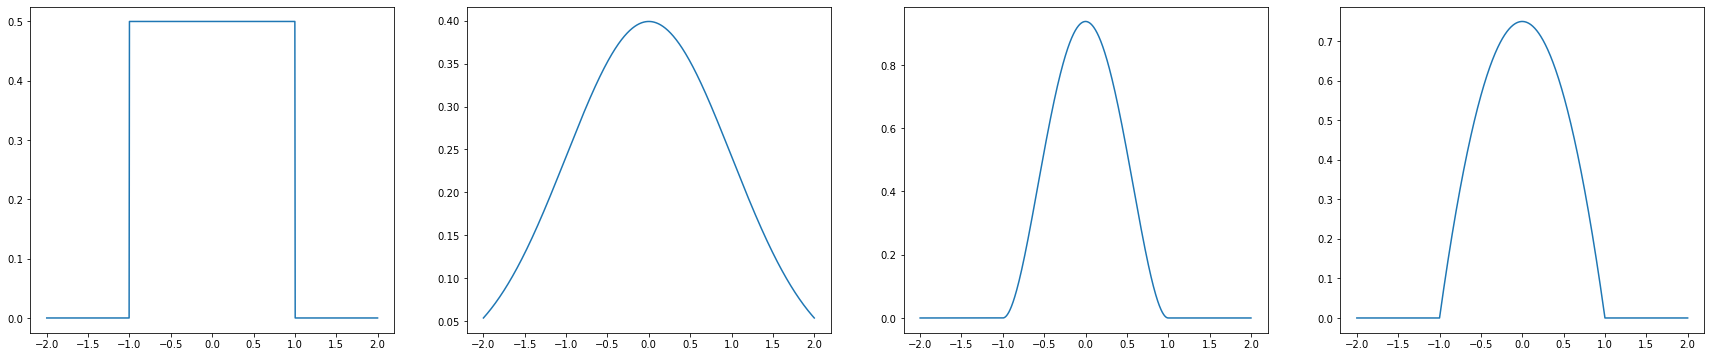

In [ ]:
def rechteck(x):
    if (x < -1 or x > 1):
        return 0
    else:
        return 0.5
    
def gauss(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-0.5*x**2)

def bisquare(x):
    if (x < -1 or x > 1):
        return 0
    else:
        return 15/16*(1-x**2)**2

def epanechnikov(x):
    if (x < -1 or x > 1):
        return 0
    else:
        return 0.75*(1-x**2)

x = np.linspace(-2, 2, 1001, endpoint=True)

rechtecky = list(map(rechteck,x))
gaussy = list(map(gauss,x))
bisquary = list(map(bisquare,x))
epay = list(map(epanechnikov,x))

fig, ax = plt.subplots(1,4)
fig.set_size_inches(30, 6)

ax[0].plot(x,rechtecky)
ax[1].plot(x,gaussy)
ax[2].plot(x,bisquary)
ax[3].plot(x,epay)
plt.show()


<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    <ol>
        <li>Bestätigen Sie die o.g. <i>Z-Scores</i> der Standardnormalverteilung empirisch.</li>
        <li>Berechnen Sie die Quantile auch für die von oben bekannte $\mathcal{X}^2$-Verteilung. Was beobachten Sie und warum?</li>
        <li>Erzeugen Sie folgende Normal-Quantil-Plots: $f(x) = \mathcal{N}(0,1),\, \mathcal{X}^2(\alpha=0.5),\, \mathcal{X}^2(\alpha=1)$.</li>
        <li>Ziehen Sie $\{25,100,1000\}$ Werte aus der Standardnormalverteilung $\mathcal{N}(0,1)$ und wenden Sie einen Kerndichteschätzer für drei verschiedene Werte von $h$ an. Was beobachten Sie?</li>
        <li><i>Optional</i>: Schreiben Sie eine eigene Routine für die Erzeugung eines Kerndichteschätzers.</li>
        <li><i>Optional</i>: Wie lässt sich ein zweidimensionaler Kerndichteschätzer konstruieren? Welche Herausforderungen ergeben sich in diesem Fall bzw. für den Fall von noch mehr Dimensionen?</li>
    </ol>
</div>

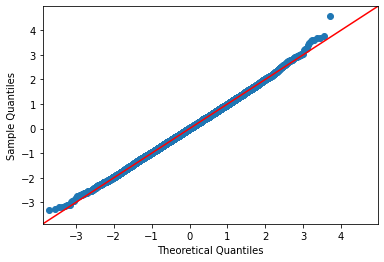

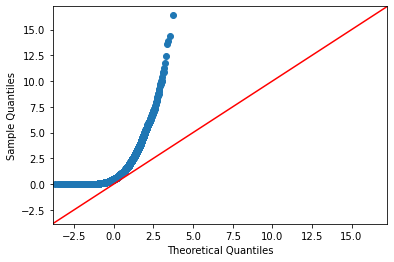

In [ ]:
#measurements = np.random.normal(loc = 0, scale = 1, size=25)   # <-- Stichprobe
# Stichprobenwerten Quantile zuordnen
# Scatterplot ausgeben
#stats.(measurements, dist="norm", plot=pylab)
#pylab.show()

import statsmodels.api as sm

test1 = np.random.normal(0,1, 10000)
test2 = np.random.chisquare(1, 10000)
sm.qqplot(test1, line='45')
sm.qqplot(test2, line='45')
pylab.show()

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Satz (Zentraler Grenzwertsatz)</b><br><br>
    Seien $X_1,\dots,X_n$ unabhängig identisch Verteilte Zufallsvariablen mit<br><br>
    $$E(X_i) = \mu \quad \text{und} \quad \text{Var}(X_i) = \sigma^2 >0.$$<br><br>
    Dann konvergiert die Verteilungsfunktion $F_(z) = P(Z_n\leq z)$ der standardisierten Summe
    $$Z_n = \frac{1}{\sqrt{n}}\sum_{i=1}^n\frac{X_i - \mu}{\sigma}$$<br><br>
    für $n \to\infty$ an jeder Stelle $z \in \mathbb{R}$ gegen die Verteilungsfunktion $\Phi(z)$ der Standardnormalverteilung:
    $$F_n(z) \to \Phi(z).$$<br><br>
    Man schreibt kurz:<br><br>
    $$Z_n \sim \mathcal{N}(0,1)$$
</div><br>
Wir beweisen den Satz zwar nicht, es ist aber interessant zu wissen, dass eine (von mehreren) mögliche Beweisidee darin besteht, das Grenzwertverhalten einzeln für die Momente der Verteilung zu bestimmen, also eine <i>Taylor-Entwicklung</i> vorzunehmen. Daran lässt sich auch ablesen, dass die Aussage weniger interessant für die Zufallsvariablen selbst ist als vielmehr deren Interpretation als Funktionale auf dem Zustandsraum bedeutsam wird.

<b>Hinweis</b>: Gilt, dass keine der Verteilungsfunktionen die anderen deutlich dominiert, so gilt der Zentrale Grenzwertsatz in deutlich allgemeineren Situationen, also wenn die $X_i$ auch korreliert (abhängig) und verschieden verteilt sind. Wir betrachten dazu ein Beispiel:<br><br>
Sei $W$ ein fairer sechsseitiger Würfel mit $p_i = \frac{1}{6}$ für $i = \{1,2,3,4,5,6\}$. Dann ist die Wahrscheinlichkeitsdichte eine Gleichverteilung.<br><br>
Betrachten wir nun $n \to \infty$ Beobachtungen (bspw. $n = 100$), dann kann man fragen, wie viele der Würfe eine bestimmte Zahl ergeben:

In [ ]:
num_samples = 100
num_distributions = 100
observation_realizations = np.zeros((6,num_distributions))
for rounds in range(num_distributions):
    observations = np.random.randint(1,6+1,size=num_samples)
    observation_realizations[0,rounds] = np.count_nonzero(observations == 1)
    observation_realizations[1,rounds] = np.count_nonzero(observations == 2)
    observation_realizations[2,rounds] = np.count_nonzero(observations == 3)
    observation_realizations[3,rounds] = np.count_nonzero(observations == 4)
    observation_realizations[4,rounds] = np.count_nonzero(observations == 5)
    observation_realizations[5,rounds] = np.count_nonzero(observations == 6)

Zur Verdeutlichung: Wir haben hier also ein $6 \times 100$-Array befüllt und betrachten nun die Histogramme für die einzelnen Ausgänge.

In [ ]:
observation_realizations.shape

(6, 100)

C:\Users\FABIAN~1\AppData\Local\Temp/ipykernel_55368/2050903957.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



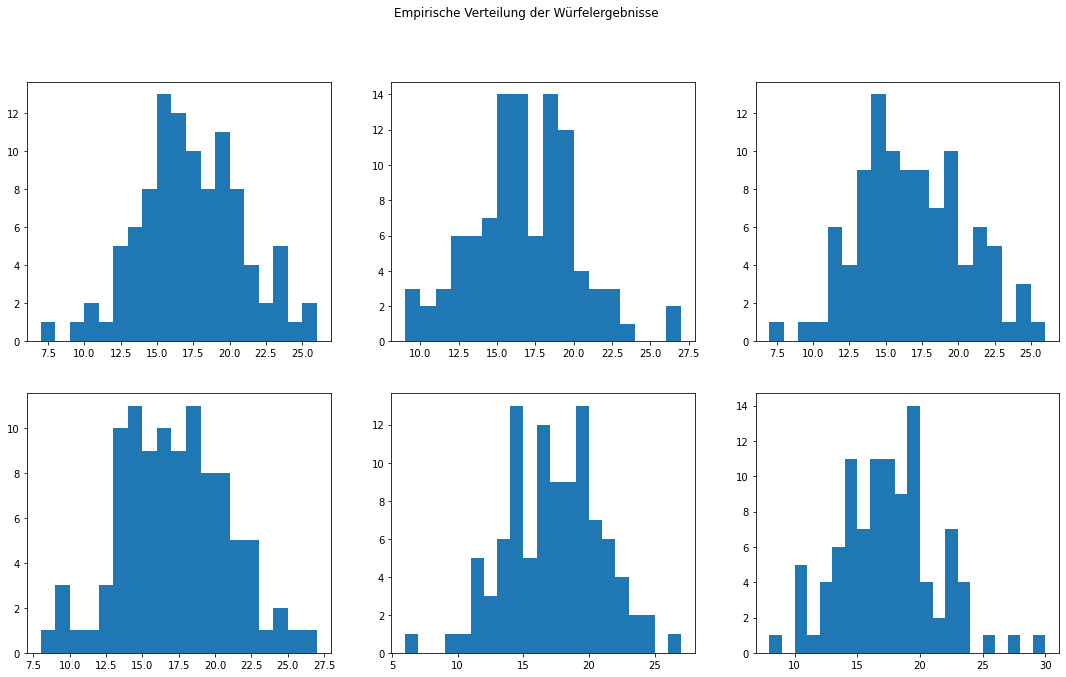

In [ ]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Empirische Verteilung der Würfelergebnisse')
binwidth=1
ax[0,0].hist(observation_realizations[0,:],bins=np.arange(min(observation_realizations[0,:]), max(observation_realizations[0,:]) + binwidth, binwidth))
ax[0,1].hist(observation_realizations[1,:],bins=np.arange(min(observation_realizations[1,:]), max(observation_realizations[1,:]) + binwidth, binwidth))
ax[0,2].hist(observation_realizations[2,:],bins=np.arange(min(observation_realizations[2,:]), max(observation_realizations[2,:]) + binwidth, binwidth))
ax[1,0].hist(observation_realizations[3,:],bins=np.arange(min(observation_realizations[3,:]), max(observation_realizations[3,:]) + binwidth, binwidth))
ax[1,1].hist(observation_realizations[4,:],bins=np.arange(min(observation_realizations[4,:]), max(observation_realizations[4,:]) + binwidth, binwidth))
ax[1,2].hist(observation_realizations[5,:],bins=np.arange(min(observation_realizations[5,:]), max(observation_realizations[5,:]) + binwidth, binwidth))
fig.show()

In [ ]:
num_samples = 10000
num_distributions = 100000
observation_realizations = np.zeros((6,num_distributions))
for rounds in range(num_distributions):
    observations = np.random.randint(1,6+1,size=num_samples)
    observation_realizations[0,rounds] = np.count_nonzero(observations == 1)
    observation_realizations[1,rounds] = np.count_nonzero(observations == 2)
    observation_realizations[2,rounds] = np.count_nonzero(observations == 3)
    observation_realizations[3,rounds] = np.count_nonzero(observations == 4)
    observation_realizations[4,rounds] = np.count_nonzero(observations == 5)
    observation_realizations[5,rounds] = np.count_nonzero(observations == 6)

C:\Users\FABIAN~1\AppData\Local\Temp/ipykernel_55368/1195421187.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



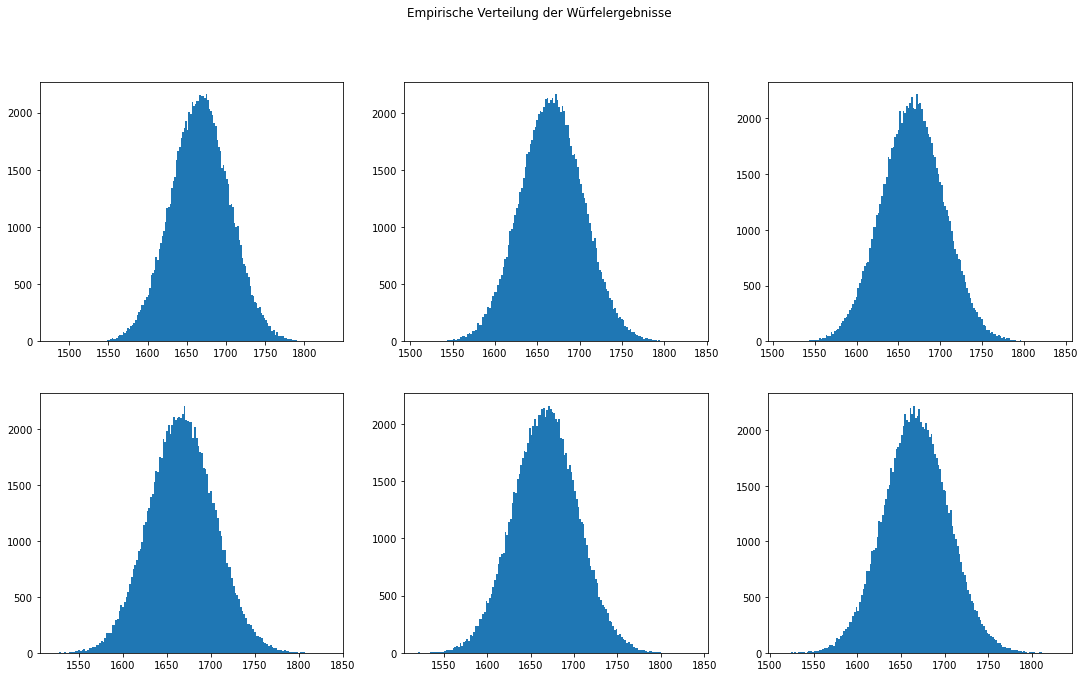

In [ ]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Empirische Verteilung der Würfelergebnisse')
binwidth=2
ax[0,0].hist(observation_realizations[0,:],bins=np.arange(min(observation_realizations[0,:]), max(observation_realizations[0,:]) + binwidth, binwidth))
ax[0,1].hist(observation_realizations[1,:],bins=np.arange(min(observation_realizations[1,:]), max(observation_realizations[1,:]) + binwidth, binwidth))
ax[0,2].hist(observation_realizations[2,:],bins=np.arange(min(observation_realizations[2,:]), max(observation_realizations[2,:]) + binwidth, binwidth))
ax[1,0].hist(observation_realizations[3,:],bins=np.arange(min(observation_realizations[3,:]), max(observation_realizations[3,:]) + binwidth, binwidth))
ax[1,1].hist(observation_realizations[4,:],bins=np.arange(min(observation_realizations[4,:]), max(observation_realizations[4,:]) + binwidth, binwidth))
ax[1,2].hist(observation_realizations[5,:],bins=np.arange(min(observation_realizations[5,:]), max(observation_realizations[5,:]) + binwidth, binwidth))
fig.show()

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    Zeigen Sie numerisch (wie oben), dass der Zentrale Grenzwertsatz auch für schiefe Verteilungen gilt:<br>
    <ol>
        <li>Wie lässt sich eine schiefe Verteilung erzeugen?</li>
        <li>Wieso gilt der Zentrale Grenzwertsatz auch für schiefe Verteilungen?</li>
        <li>Eine weitere Sichtweise ist die Annäherung der empirischen Häufigkeiten an die theoretischen Häufigkeiten. Führen Sie folgendes Experiment durch: Betrachten Sie eine schiefe, aber diskrete Wahrscheinlichkeitsverteilung. Plotten Sie die empirische Häufigkeitsverteilung der Ausgänge $1,\dots,100$ durchgeführte Beobachtungen. Was erkennen Sie?
    </ol>
</div>

Wir haben bereits gesehen, dass i.A. die Stichprobe nicht identisch ist mit der tatsächlichen Verteilung der Wahrscheinlichkeiten eines Zufallsprozess. Diese Größe ist nicht zugänglich, sondern kann nur angenähert beschrieben werden: Im engeren Sinne durch eine empirische Stichprobe und im weiteren Sinne durch ein darauf aufbauenes Modell. Nehmen wir an, dass wir nicht nur eine Stichprobe $\{x_i\}$ einer binären Zufallsvariablen $X$ gezogen haben, deren Verteilung $0.88:0.12$ sei, sondern noch eine zweite, deren Aufteilung der Ausprägungen $0.93:0.07$ laute.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Statistischer Schätzer)</b><br><br>
    Sei $X$ eine Zufallsvariable und $X_,\dots,X_n$ eine Stichprobe. Eine Schätzfunktion für den Grundgesamtheitsparameter $\Theta$ ist eine Funktion $$\hat{f} = g(X_1,\dots,X_n)$$<br><br>
    der Stichprobe $\{X_i\}$. Der aus den Realisierungen $x_1,\dots,x_n$ resultierende Wert $g(x_1,\dots,x_n)$ ist der zugehörige <i>Schätzwert</i>.
</div><br>
<b>Wir erkennen, dass es hier in der Definition keinen Unterschied macht, ob ein stochastisches Modell oder eines des Maschinellen Lernens zum Einsatz kommt. In der Tat gibt es keine <i>sachlichen</i> Unterschied, sondern nur einen <i>technischen</i>, nämlich den der Wahl der Methode, die zur Konstruktion des Schätzers führt.</b><br>
Anmerkung: Wir nennen den Schätzer hier $g(x)$, da $f(x)$ für den zugrunde liegenden stochastischen Zusammenhang steht. Es ist also wie zuvor auch gesucht $\hat{f} = g \approx f$

Wir können aus dieser Beobachtung zusammen mit der Definition der mittleren quadratischen Ableitung den tieferliegenden Grund für die Nützlichkeit dieses Fehlermaßes herleiten. Mit der Schätzstatistik $\hat{f}$ und dem Grundgesamtheitsparameter $\Theta$ können wir den folgenden Ausdruck auswerten:<br><br>
Der mittlere quadratische Fehler einer Schätzstatistik $\hat{f}$ ist
$$E([\hat{f}-\Theta]^2).$$<br><br>
Definitionsgemäß stellt dies eine Art der Berechnung der <i>erwarteten</i> Abweichung der Schätzung von den <i>wahren</i> Werten dar. Wir können den Ausdruck ausmultiplizieren:<br><br>
$$E([\hat{f}-\Theta]^2) = E([\hat{f}-E(\hat{f})+E(\hat{f})-\Theta]^2) =  E([\hat{f}-E(\hat{f})]^2+2E([\hat{f}-E(\hat{f})][E(\hat{f})-\Theta])+E([E(\hat{f})-\Theta]^2) = E([\hat{f}-E(\hat{f})]^2)+[E(\hat{f})-\Theta]^2 = \text{Var}(\hat{f})+\text{Bias}(\hat{f})^2$$<br><br>
Wir haben hier also den im Modul Maschinelles Lernen postulierten Trade-Off zwischen Bias und Varianz bestätigt.<br><br>
In der Praxis ist die Zerlegung in Bias und Varianz natürlich zumeist nicht möglich, sondern kann höchstens anhand von Modellannahmen geschätzt werden.

Wir haben bisher Dichtefunktionen als parametrische Darstellung des Grundzusammenhangs betrachtet. Um zu einer wirksamen Schätzung zu kommen ist folglich der Parameter so zu estimieren, dass, anstatt für festen Parameter $\Theta$ die Übereinstimmung der Dichtefunktion mit der empirischen Dichtefunktion zu messen, den Parameter so anzupassen, dass die Übereinstimmung maximal wird.<br>
<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Maximum-Likelihood-Schätzung)</b><br><br>
    Sei $\{x_1,\dots,x_i\}$ eine Stichprobe von $X$. Dann ist als Paramterschätzer derjenige Wert $\hat{Theta}$ zu wählen,. für den die Likelihood maximal ist, also
    $$L(\hat{\Theta}) = \text{max}_\Theta L(\Theta),$$
    bzw.
    $$f(x_1,\dots,x_n|\hat{\Theta})=\text{max}_\Theta f(x_1,\dots,x_n|\Theta).$$
</div>

Wir wissen bereits, wie dies prinzipiell funktioniert, nämlich durch Nullsetzen der partiellen Ableitung. Für <i>interessante</i> Modelle führt dies jedoch zu komplizierten und mithin meist unlösbaren Ausdrücken. Erfahrungsgemäß ist es zielführender, den Ausdruck zu Logarithmisieren; man erhält dann die sog. <i>Log-Likelihood</i>-Funktion, deren Maximierung oft leichter ist, da durch die Logarithmusgesetze die Faktoren der Likelihood-Funktion zu Summanden werden:<br>
<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition (Log-Likelihood-Schätzung)</b><br><br>
    $$\text{ln}L(\Theta) = \sum_{i=1}^n\text{ln}f(x_i|\Theta)$$
</div>

<b>Beispiel:</b><br><br>
Für Poisson-Prozess ist die Log-Likelihood-Funktion
$$\text{ln}L(\lambda) = \sum_{i=1}^n\text{ln}\Bigg(e^{-\lambda}\frac{\lambda^{x_i}}{x_i!}\Bigg),$$
für normalverteilte Zufallsgrößen
$$\text{ln}L(\mu,\sigma) = \sum_{i=1}^n\Bigg[-\text{ln}\sqrt{2\pi}-\text{ln} \sigma - \frac{(x_i-\mu)^2}{2\sigma^2}\Bigg]$$

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    Wir vermuten, dass ein Zufallsprozess $X$ dem Poisson-Modell $ P_\lambda(k) = \frac{\lambda^k}{k!}e^{-\lambda}$ folgt.
    <ol>
        <li>Plotten Sie $P_\lambda(k)$ für $\lambda = \{1,\dots,30\}$.</li>
        <li>Schätzen Sie für $x_1 = 2, x_2 = 4, x_3 = 6, x_4=3$ den Parameter $\lambda$ von $X$ mittels der Log-Likelihood.</li>
    </ol>
</div>

Die hier angegebenen statistischen Schätzungen folgen der Prämisse einer <i>objektiven</i> Wahrscheinlichkeitsinterpretation. Wir haben gesehen, dass ein konzeptuelles Problem mit dieser Sichtweise darin besteht, dass die zugrunde liegenden tatsächlichen Zusammenhänge regelmäßig nicht zugänglich sind, sondern nur die empirischen Realisiererungen. Die <i>Bayes-Schätzung</i> basiert auf dem Standpunkt der <i>subjektiven Wahrwscheinlichkeitsinterpretation</i>, also (in etwa) dass es sinnlos sei, die zugrunde liegenden Zusammenhänge im Vergleich zur Relevanz der Schätzung zu vernachlässigen sind. Die Unsicherheit wird hier stets durch einen Parameter repräsentiert, d.h. es werden zugehörige Parameterwerte als Realisierungen von Zufallsvariablen angesehen. Bevor Daten aus der Stichprobe vorliegen, werden die Parameter durch eine <i>a priori</i>-Verteilung beschrieben, die durch Kenntnis der Realisierungen nach und nach verbessert wird.<br><br>
Die Ähnlichkeit zum Lernen von künstlichen Neuronalen Netzen ist ebenso verblüffend wie treffend.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Satz (Theorem von Bayes)</b><br><br>
    Beschreibe $f(\theta)$ die a-priori-Wahrscheinlichkeitsfunktion von $\Theta$, d.h. die modellierte Randverteilung von $\Theta$,<br> f(x) die Dichte von $X$,<br> $f(x|\Theta)$ die bedingte Wahrscheinlichkeitsfunktion von $X$, gegeben $\theta = \Theta$ und<br> $f(\theta)$ die <i>a-posteriori</i>-Dichte von $\Theta$, also unter der Beobachtung der Realisierung $X = x$,<br> sowie $f(x,\theta)$ die gemeinsame Verteilungsfunktion. Dann gilt:<br><br>
    $$f(\theta|x) = \frac{f(x,\theta)}{f(x)} = \frac{f(x|\theta f(\theta)}{f(x)}.$$
</div>

Das Bayesianische Lernen besteht also darin, die subjektive (a-priori)-Information über $\theta$ und die Stichprobeninformation mittels des Satzes von Baes zur a-posteriori-Wahrscheinlichkeitsdichte zu transformieren. Im Falle von stetigen Zufallsvariablen wird der Satz von Bayes dann zu einem Integral:<br><br>
$$f(\theta|x) = \frac{f(x,\theta)}{f(x)} = \frac{f(x,\theta)}{\int f(x|\theta)f(\theta)\,\text{d}\theta}.$$<br><br>
Als Schätzer für $\theta$ bieten sich übliche Lageparameter der vermuteten Verteilung an, worüber dann in Form einer Gittersuche iteriert werden kann.

<b>Intervallschätzung</b><br><br>
Die Punktschätzung $\hat{f}$ liefert einen Schätzwert, der i.d.R. vom wahren Wert abweicht. Es scheint daher sinnvoll, neben dem Schätzwert auch dessen Konfidenz anzugeben.

<div style="border:1px solid black; background-color: #eefefe; padding:15px;">
    <b>Definition ($1-\alpha$-Konfidenzintervall)</b><br><br>
    Seien die zwei Stichprobenfunktionen $G_u = g_u(X_1,\dots,X_n)$ und $G_o = g_o(X_1,\dots,X_n)$ die obere bzw. untere Intervallgrenze der Realisationen von $X$ für ein gegebenes $x$. Dann heißt $[g_u,g_o]$ ein $1-\alpha$-Konfidenzintervall, wenn gilt:<br><br>
    $$P(G_u \leq G_o) = 1\quad\text{ und }\quad P(G_u \leq \hat{f} \leq G_o) = 1-\alpha.$$
</div><br>
<b>Interpretation des Konfidenzintervalls</b>: Die so bestimmten Intervallgrenzen sind keine Konstanten, sondern Zufallsvariablen. Daraus folgt folgende Interpretation: Die Konfidenzintervalle sind so konstruiert, dass mit Wahrscheinlichkeit $1-\alpha$ das Intervall $[G_u,G_o]$ den wahren Wert überdeckt. Das ist aber eine Eigenschaft der Konstruktion des Schätzers, keine Eigenschaft des wahren Wertes. Daher gilt: Aus dem <i>realisierten</i> Konfidenzintervall $[g_u,g_o]$ lässt sich <b><i><u>NICHT</u></i></b> schließen, dass $\theta$ mit Wahrscheinlichkeit $1-\alpha$ darin enthalten wäre. In $[g_u,g_o]$ ist $\theta$ enthalten oder auch nicht enthalten. Diese Information, bzw. die Gewissheit darüber ist nicht zugänglich.<br><br>
<b>Hinweis</b>: Wir treffen hier die Annahme, dass $G_u$ und $G_o$ echte Variabilität aufweisen, also unterschiedliche Ausprägungen haben können. Dies ist für die meisten Maschinellen Lerner aber nicht der Fall: Die Schätzung $\hat{f}(x)$ ist deterministisch. Somit können zwar empirische Konfidenzintervalle berechnet werden (s.u.), diese sind jedoch nicht analytisch gesichert, wenn die abgebildete tatsächliche Verteilung nicht bekannt ist. (Im Umkehrschluss bedeutet dies, dass auch stochastisch bestimmte Konfidenzintervalle verworfen werden müssen, wenn die Modellannahmen nicht erfüllt sind.)

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
    <b>Übung:</b><br><br>
    <ol>
        <li>Reproduzieren Sie eine Regression für <i>cruise_ship_info.csv</i> mittels der Package <i>statsmodels</i>.</li>
        <li>Plotten sie die Randverteilungen und fügen Sie die ausgegebenen Konfidenzintervalle in die Plots ein. Was beobachten Sie?</li>
    </ol>
</div>

Eine wichtige, aber bisher nicht betrachtete Frage ist diejenige nach der Vergleichbarkeit von Stichproben, bzw. Verteilungen ähnlicher Schätzparameter. Hierzu gibt es eine Reihe von Verfahren, die (Plausibilitäts-) oder Hypothesentests genannt werden.

<hr>

<h2>Zusammenfassung</h2>
Wir hatten uns eine ganze Menge für diese Vorlesung vorgenommen, nicht alles davon konnte eingeführt werden:

<ol>
    <li><b>Einleitung: Sinn und Zweck von <i>Mathematische Methoden der Data Science (MMDS)</i></b></li>
    <ol>
        <li>Logistik des Moduls</li>
        <li>Übersicht und Einordnung</li>
        <li>Lernziele</li>
        <li>Arbeitsweise MMDS</li>
        <li>Lösung Selbsteinschätzungstest</li>
    </ol> 
    <li><b>Analysis</b></li>
        <ol>
            <li>Vorraussetzungen: Differential- und Integralrechnung</li>
            <li>Metriken und Grundlagen der Topologie</li>
            <li>Die Taylor-Entwicklung</li>
            <li>Fourieranalysis</li>
<li><strike>Elementare Differentialgleichungen</strike> --> <b>Modul Analyse von Finanzdaten</b></li>
        </ol>
    <li><b>Lineare Algebra</b></li>
        <ol>
            <li>Voraussetzungen: Vektor- und Matrixrechnung</li>
            <li>(Matrix-)Transformationen</li>
            <li>Affine Räume</li>
<li><strike>Tensorbegriff</strike> --> <b>Modul Deep Learning</b></li>
            <li>Gruppentheorie</li>
            <li>Zerlegungen</li>
        </ol>
    <li><b>Stochastik und Statistik</b></li>
    <ol>
        <li>Voraussetzungen: Zufallsvariablen</li>
        <li>Verteilungen und ihre Eigenschaften</li>
        <li>Kausalitäts- vs. Korrelationsbegriff</li>
        <li>Das Bayes-Theorem</li>
        <li>Diskrete Zufallsvariablen</li>
        <li>Stetige Zufallsvariablen</li>
        <li><strike>Satz von Gliwenko-Cantelli</strike> (ersatzlos)</li>
        <li>Zentraler Grenzwertsatz</li>
<li><strike>Hypothesentests: Augmented Dickey Fuller</strike>
--> <b>Modul Analyse von Finanzdaten</b></li>
<li><strike>Fehlerrechnung und -propagation</strike> --> <b>Modul Analyse techn. Daten</b></li>
    </ol>
</ol>